In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import yfinance as yf
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.layers import LSTM, Dropout, Dense, Input
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df=pd.read_csv('MSFT_2006-01-01_to_2018-01-01.csv')

In [21]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,26.25,27.00,26.10,26.84,79974418,MSFT
1,2006-01-04,26.77,27.08,26.77,26.97,57975661,MSFT
2,2006-01-05,26.96,27.13,26.91,26.99,48247610,MSFT


In [22]:
df

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,26.25,27.00,26.10,26.84,79974418,MSFT
1,2006-01-04,26.77,27.08,26.77,26.97,57975661,MSFT
2,2006-01-05,26.96,27.13,26.91,26.99,48247610,MSFT
3,2006-01-06,26.89,27.00,26.49,26.91,100969092,MSFT
4,2006-01-09,26.93,27.07,26.76,26.86,55627836,MSFT
...,...,...,...,...,...,...,...
3014,2017-12-22,85.40,85.63,84.92,85.51,14145841,MSFT
3015,2017-12-26,85.31,85.53,85.03,85.40,9891237,MSFT
3016,2017-12-27,85.65,85.98,85.22,85.71,14678025,MSFT
3017,2017-12-28,85.90,85.93,85.55,85.72,10594344,MSFT


In [23]:
df.shape

(3019, 7)

        Date   Open   High    Low  Close     Volume  Name
0 2006-01-03  26.25  27.00  26.10  26.84   79974418  MSFT
1 2006-01-04  26.77  27.08  26.77  26.97   57975661  MSFT
2 2006-01-05  26.96  27.13  26.91  26.99   48247610  MSFT
3 2006-01-06  26.89  27.00  26.49  26.91  100969092  MSFT
4 2006-01-09  26.93  27.07  26.76  26.86   55627836  MSFT


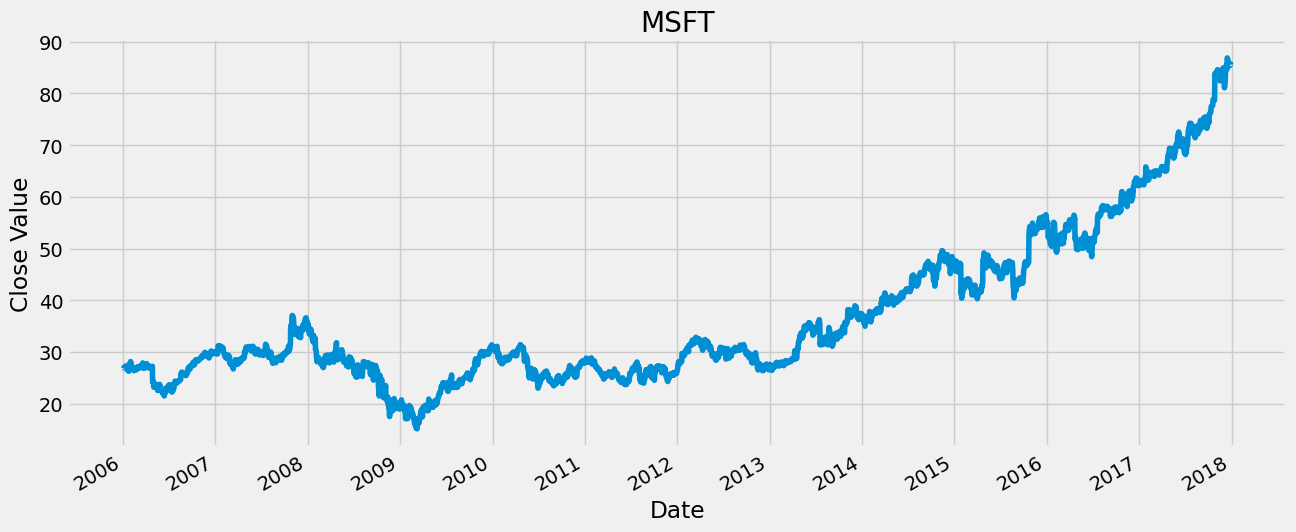

In [24]:
df['Date'] = pd.to_datetime(df['Date'])

print(df.head())
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,6))
plt.title('MSFT')
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Value')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.gcf().autofmt_xdate()


In [25]:
scaler = MinMaxScaler(feature_range=(0, 1))
df[['Close']] = scaler.fit_transform(df[['Close']].values.reshape(-1, 1))


In [26]:
def create_dataset(dataset, lookback=60):
    dataX, dataY = [], []
    for i in range(len(dataset) - lookback):
        dataX.append(dataset[i:(i + lookback)])
        dataY.append(dataset[i + lookback])
    return np.array(dataX), np.array(dataY)

lookback = 60
data = df['Close'].values

train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train, test = data[0:train_size], data[train_size:len(data)]

x_train, y_train = create_dataset(train, lookback)
x_test, y_test = create_dataset(test, lookback)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [26]:
def create_dataset(dataset, lookback=60):
    dataX, dataY = [], []
    for i in range(len(dataset) - lookback):
        dataX.append(dataset[i:(i + lookback)])
        dataY.append(dataset[i + lookback])
    return np.array(dataX), np.array(dataY)

lookback = 60
data = df['Close'].values

train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train, test = data[0:train_size], data[train_size:len(data)]

x_train, y_train = create_dataset(train, lookback)
x_test, y_test = create_dataset(test, lookback)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [27]:
model = Sequential()
model.add(Input(shape=(lookback, 1)))  
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
74/74 - 2s - 31ms/step - loss: 0.0038
Epoch 2/50
74/74 - 1s - 18ms/step - loss: 6.9985e-04
Epoch 3/50
74/74 - 1s - 18ms/step - loss: 6.4535e-04
Epoch 4/50
74/74 - 1s - 18ms/step - loss: 5.8331e-04
Epoch 5/50
74/74 - 1s - 19ms/step - loss: 6.0206e-04
Epoch 6/50
74/74 - 1s - 18ms/step - loss: 4.9591e-04
Epoch 7/50
74/74 - 1s - 18ms/step - loss: 5.7059e-04
Epoch 8/50
74/74 - 1s - 19ms/step - loss: 4.8662e-04
Epoch 9/50
74/74 - 1s - 19ms/step - loss: 5.0188e-04
Epoch 10/50
74/74 - 1s - 18ms/step - loss: 4.7986e-04
Epoch 11/50
74/74 - 1s - 19ms/step - loss: 4.3196e-04
Epoch 12/50
74/74 - 1s - 19ms/step - loss: 4.1951e-04
Epoch 13/50
74/74 - 1s - 19ms/step - loss: 3.9650e-04
Epoch 14/50
74/74 - 1s - 18ms/step - loss: 4.2378e-04
Epoch 15/50
74/74 - 1s - 19ms/step - loss: 3.8494e-04
Epoch 16/50
74/74 - 1s - 19ms/step - loss: 3.5462e-04
Epoch 17/50
74/74 - 1s - 18ms/step - loss: 3.3637e-04
Epoch 18/50
74/74 - 1s - 19ms/step - loss: 3.2373e-04
Epoch 19/50
74/74 - 1s - 19ms/step - loss

In [28]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_scaled = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

train_rmse = np.sqrt(mean_squared_error(y_train_scaled, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_scaled, test_predict))
train_r2 = r2_score(y_train_scaled, train_predict)
test_r2 = r2_score(y_test_scaled, test_predict)

print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')
print(f'Train R2 Score: {train_r2:.2f}')
print(f'Test R2 Score: {test_r2:.2f}')

74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Train RMSE: 0.73
Test RMSE: 0.96
Train R2 Score: 0.99
Test R2 Score: 0.99


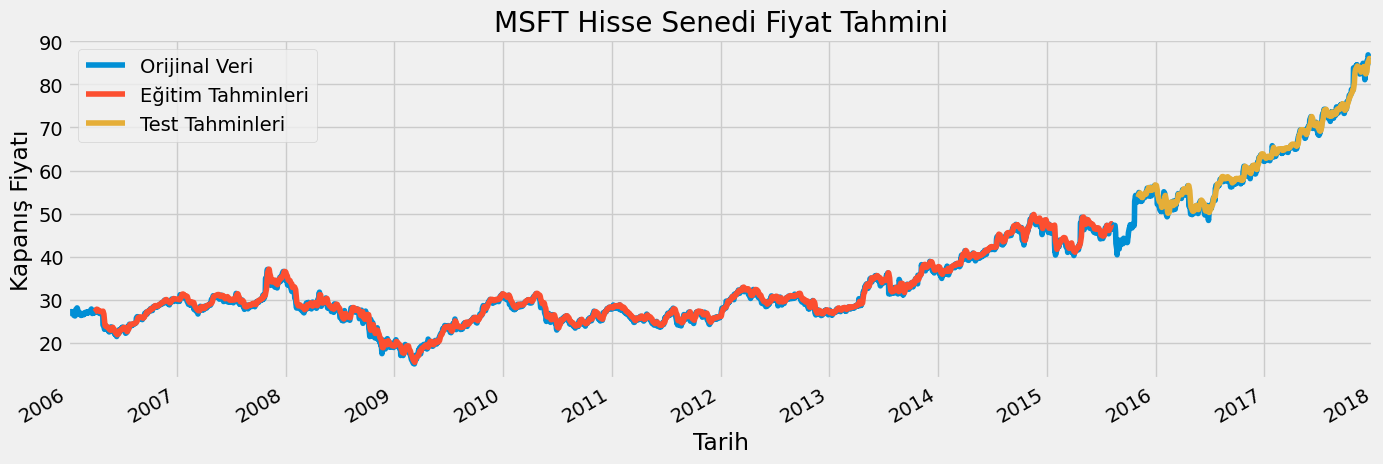

In [29]:
train_predict_plot = np.empty_like(data)
train_predict_plot[:] = np.nan
train_predict_plot[lookback:len(train_predict)+lookback] = train_predict[:, 0]

test_predict_plot = np.empty_like(data)
test_predict_plot[:] = np.nan
test_predict_plot[len(train_predict)+(lookback*2):len(train_predict)+(lookback*2) + len(test_predict)] = test_predict[:, 0]


df['Date'] = pd.to_datetime(df['Date'])


plt.figure(figsize=(15, 5))
plt.plot(df['Date'], scaler.inverse_transform(data.reshape(-1, 1)), label='Orijinal Veri')
plt.plot(df['Date'][lookback:len(train_predict)+lookback], train_predict_plot[lookback:len(train_predict)+lookback], label='Eğitim Tahminleri')
plt.plot(df['Date'][len(train_predict)+(lookback*2):len(train_predict)+(lookback*2) + len(test_predict)], test_predict_plot[len(train_predict)+(lookback*2):len(train_predict)+(lookback*2) + len(test_predict)], label='Test Tahminleri')
plt.title('MSFT Hisse Senedi Fiyat Tahmini')


plt.xlim(pd.Timestamp('2006-01-01'), pd.Timestamp('2018-01-01'))

plt.xlabel('Tarih')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()
plt.ylabel('Kapanış Fiyatı')
plt.legend()
plt.show()

In [30]:
def predict_future_prices_with_dynamic_trend(model, recent_data, future_steps, scaler, lookback=60, trend_factor=0.01):
    predictions = []
    current_data = recent_data[-lookback:].reshape(-1, 1) 

    for step in range(future_steps):
        current_data_reshaped = current_data.reshape((1, lookback, 1))
        predicted_price = model.predict(current_data_reshaped)
        predicted_price_unscaled = scaler.inverse_transform(predicted_price)

        trend = trend_factor * np.mean(predictions[-lookback:]) if predictions else trend_factor
        final_predicted_price = predicted_price_unscaled[0, 0] + trend

        predictions.append(final_predicted_price)
        final_predicted_price_reshaped = np.array([[final_predicted_price]])
        scaled_final_predicted_price = scaler.transform(final_predicted_price_reshaped)
        
        current_data = np.append(current_data[1:], scaled_final_predicted_price).reshape(-1, 1)

    return predictions

recent_data = df['Close'].values[-lookback:]  
future_steps = 30
future_predictions = predict_future_prices_with_dynamic_trend(model, recent_data, future_steps, scaler)

print(f'Gelecek {future_steps} gün için tahmin edilen fiyatlar:')
for i, price in enumerate(future_predictions):
    print(f"Day {i+1}: {price:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1